<a href="https://colab.research.google.com/github/shanmukhareddygali/Heart-Disease-Prediction/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Case Study**

# Heart Disease Prediction

**Problem Statement**

In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset
data = pd.read_csv("/content/drive/My Drive/heart.csv")

**Dataset Description:**



age	: Age of the patient in years

sex	: Gender of the patient (0 = male, 1 = female)

cp	: Chest pain type
0- Typical angina,
1- Atypical angina,
2- Non-anginal pain,
3- Asymptomatic

trestbps:	Resting blood pressure in mm Hg

chol	: Serum cholesterol in mg/dl

fbs	: Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)

restecg	:Resting electrocardiographic results:
0- Normal,
1- Having ST-T wave abnormality, 2- Showing probable or definite left ventricular hypertrophy

thalach :	Maximum heart rate achieved during a stress test

exang	: Exercise-induced angina (1 = yes, 0 = no)

oldpeak :	ST depression induced by exercise relative to rest

slope	: Slope of the peak exercise ST segment:
0- Upsloping,
1- Flat,
2- Downsloping.

ca :	Number of major vessels (0-4) colored by fluoroscopy

thal	: Thalium stress test result:
0- Normal,
1- Fixed defect,
2- Reversible defect,
3- Not described.

target :	Heart disease status (0 = no disease, 1 = presence of disease)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values in the dataset

In [ ]:
#check basic statistical information
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Based on the data types and the feature explanations we had earlier, we can see that 7 columns (sex, cp, fbs, restecg, exang, slope and thal) are indeed numerical in terms of data type, but categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation:

In [ ]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca','target']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in data.columns if feature not in continuous_features]

# Convert the identified features to object data type
data[features_to_convert] = data[features_to_convert].astype('object')

data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [ ]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


Numerical Features:

1.age: The average age of the patients is approximately 54.4 years, with the
youngest being 29 and the oldest 77 years.

2.trestbps: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.

3.chol: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.

4.thalach: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.

5.oldpeak: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

6.target: Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.

7.ca: There are five unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 175 times.

In [ ]:
data.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,thal
count,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4
top,1,0,0,1,0,2,2
freq,207,143,258,152,204,142,166


Categorical Features (object data type):

sex: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 207 times out of 303 entries.

cp: Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

fbs: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.

restecg: Three unique results are present. The most common result is "1", appearing 152 times.

exang: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 204 times.

slope: Three unique slopes are present. The most frequent slope type is "2", which occurs 142 times.

thal: Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 166 times.



# Making the data more simple

In [ ]:
#change names of columns for better understanding
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
#change values of column
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

<ipython-input-13-392cab02d919>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'][data['sex'] == 0] = 'female'
<ipython-input-13-392cab02d919>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'][data['sex'] == 1] = 'male'


In [ ]:
#change values of column
data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

<ipython-input-14-487f3f91a527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
<ipython-input-14-487f3f91a527>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
<ipython-input-14-487f3f91a527>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chest_pain_type'][data['chest_pain_type'] =

In [ ]:
#change values of column
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

<ipython-input-15-c823d96a8cdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
<ipython-input-15-c823d96a8cdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'


In [ ]:
#change values of column
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

<ipython-input-16-e14fc7e9865d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
<ipython-input-16-e14fc7e9865d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
<ipython-input-16-e14fc7e9865d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'


In [ ]:
#change values of column
data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

<ipython-input-17-e66f5205564f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['st_slope'][data['st_slope'] == 0] = 'upsloping'
<ipython-input-17-e66f5205564f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['st_slope'][data['st_slope'] == 1] = 'flat'
<ipython-input-17-e66f5205564f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['st_slope'][data['st_slope'] == 2] = 'downsloping'


In [ ]:
#change values of column
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

<ipython-input-18-d64cfe6efbfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
<ipython-input-18-d64cfe6efbfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'


In [ ]:
#change values of column
data['thalassemia'][data['thalassemia'] == 0] = 'normal'
data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'reversable defect'
data['thalassemia'][data['thalassemia'] == 3] = 'not described'

<ipython-input-19-4fd6f9701a1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['thalassemia'][data['thalassemia'] == 0] = 'normal'
<ipython-input-19-4fd6f9701a1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
<ipython-input-19-4fd6f9701a1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['thalassemia'][data['thalassemia'] == 2] = 'reversable defect'
<ipython

# Exploratory Data Analysis

In [ ]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,flat,0,not described,0
299,45,male,asymptomatic,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,flat,0,not described,0
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,flat,2,not described,0
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,flat,1,not described,0


**1.How many people affected with Heart disease?**

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

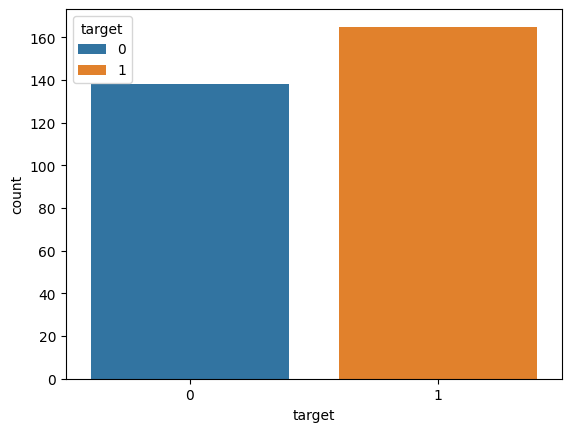

In [ ]:
#plot count plot
sns.countplot(x='target',data=data,hue = 'target')
plt.show()

Insights:

1.165 people are affected with heart disease.



**2.Heart disease frequency with respect to age?**





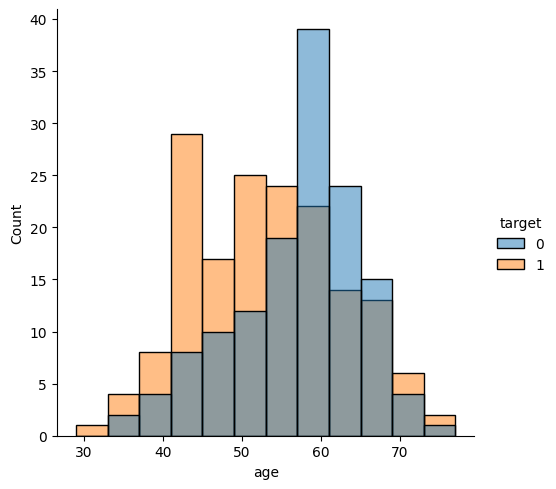

In [ ]:
#plot displot
sns.displot(data=data, x="age", hue="target", kde=False)

Insights:

1.Getting of Heart disease below age 50 is very high.

**3.Heart disease frequency with respect to Gender?**

In [ ]:
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
female,24,72
male,114,93


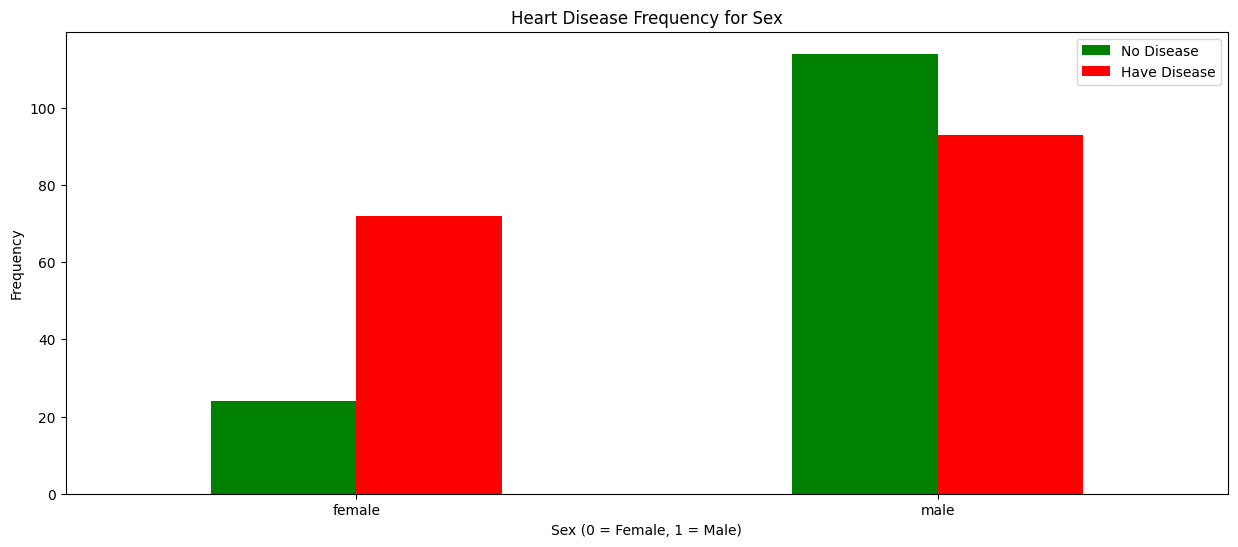

In [ ]:
#plot bar chart
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Insights:

Most of the females have heart disease.

**4.Thalassemia vs Target**

In [ ]:
ques_4 = data.groupby(['thalassemia','target']).size().unstack()
ques_4

target,0,1
thalassemia,,
fixed defect,12,6
normal,1,1
not described,89,28
reversable defect,36,130


Text(0, 0.5, 'count')

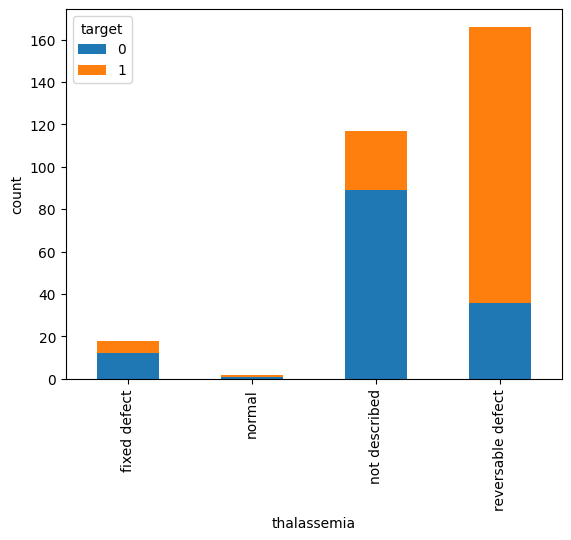

In [ ]:
#plot stacked bar chart
ques_4.plot(kind = 'bar',stacked = True)
plt.ylabel('count')

Insights:

1.people with reversible effect are more prone to heart disease.

**5.Chest pain type vs Target?**

In [ ]:
ques_5 = data.groupby(['chest_pain_type','target']).size().unstack()
ques_5

target,0,1
chest_pain_type,,
asymptomatic,7,16
atypical angina,9,41
non-anginal pain,18,69
typical angina,104,39


Text(0, 0.5, 'count')

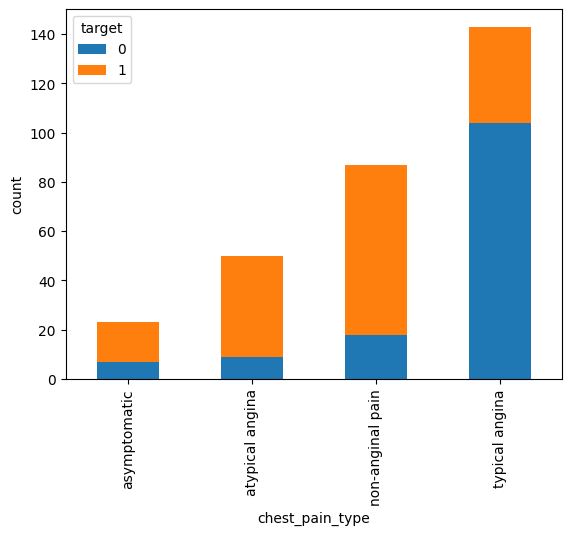

In [ ]:
#plot stacked bar chart
ques_5.plot(kind = 'bar',stacked = True)
plt.ylabel('count')

Insight:

1.atypical and non anginal pain are major symptoms for having heart disease.

**6.Fasting blood sugar vs Target ?**

In [ ]:
ques_6 = data.groupby(['fasting_blood_sugar','target']).size().unstack()
ques_6

target,0,1
fasting_blood_sugar,,
greater than 120mg/ml,22,23
lower than 120mg/ml,116,142


Text(0, 0.5, 'count')

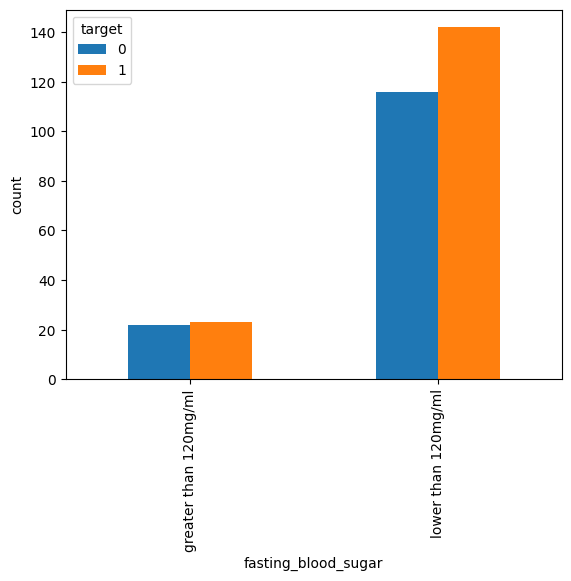

In [ ]:
#plot unstacked bar chart
ques_6.plot(kind = 'bar',stacked = False)
plt.ylabel('count')

Insights:

1.From above figure,It is difficult to say about the impact of fasting blood sugar.

**7.Exercise induced angina vs Target ?**

In [ ]:
ques_7 = data.groupby(['exercise_induced_angina','target']).size().unstack()
ques_7

target,0,1
exercise_induced_angina,,
no,62,142
yes,76,23


Text(0, 0.5, 'count')

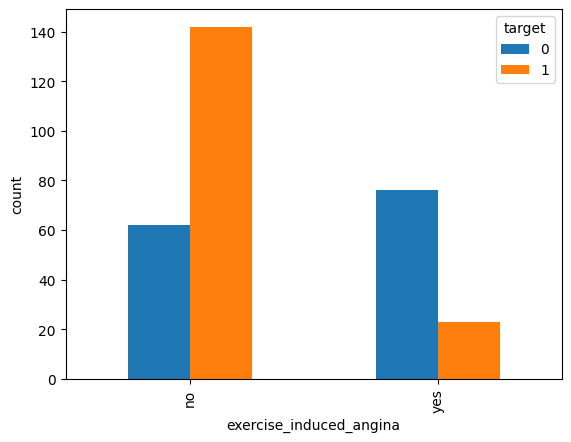

In [ ]:
#plot unstacked bar chart
ques_7.plot(kind = 'bar',stacked = False)
plt.ylabel('count')

Insights:

1.Exercise induced angina is not linked to heart disease.

2.Non exercise angina is more linked to heart disease.

8.rest ecg vs target ?

In [ ]:
ques_8 = data.groupby(['rest_ecg','target']).size().unstack()
ques_8

target,0,1
rest_ecg,,
ST-T wave abnormality,56,96
left ventricular hypertrophy,3,1
normal,79,68


Text(0, 0.5, 'count')

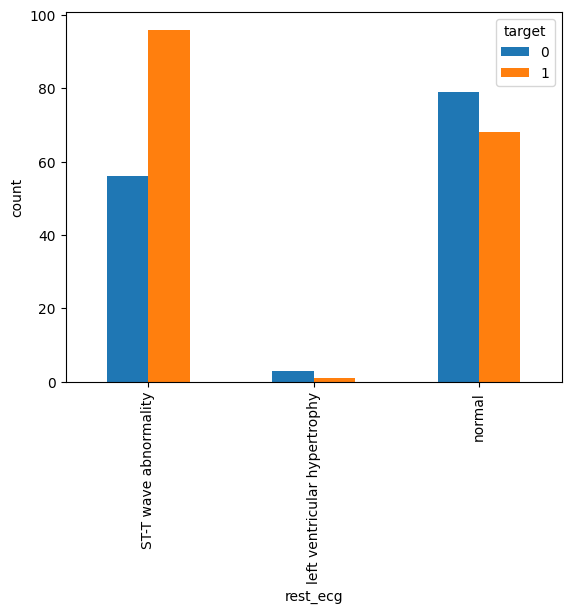

In [ ]:
#plot unstacked bar chart
ques_8.plot(kind = 'bar',stacked = False)
plt.ylabel('count')

Insights:

1.St-T wave abnormality is more prone to heart disease.

**9.Relationship between numerical variables?**

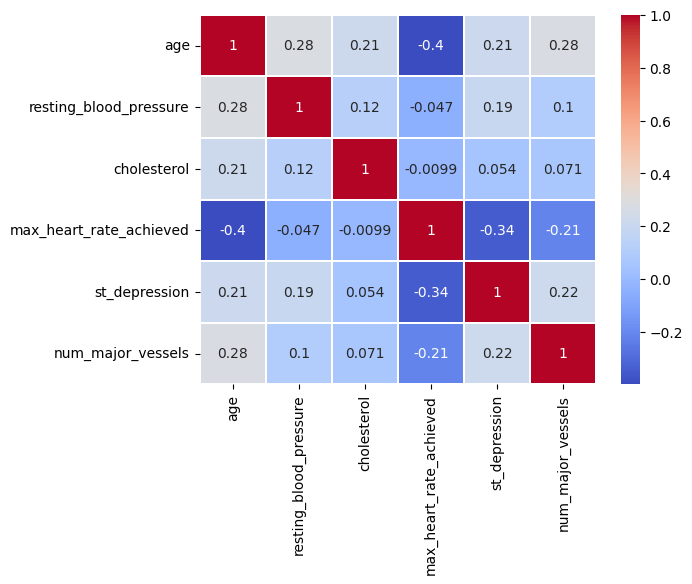

In [ ]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']
#Correlation plot
df_corr = data.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

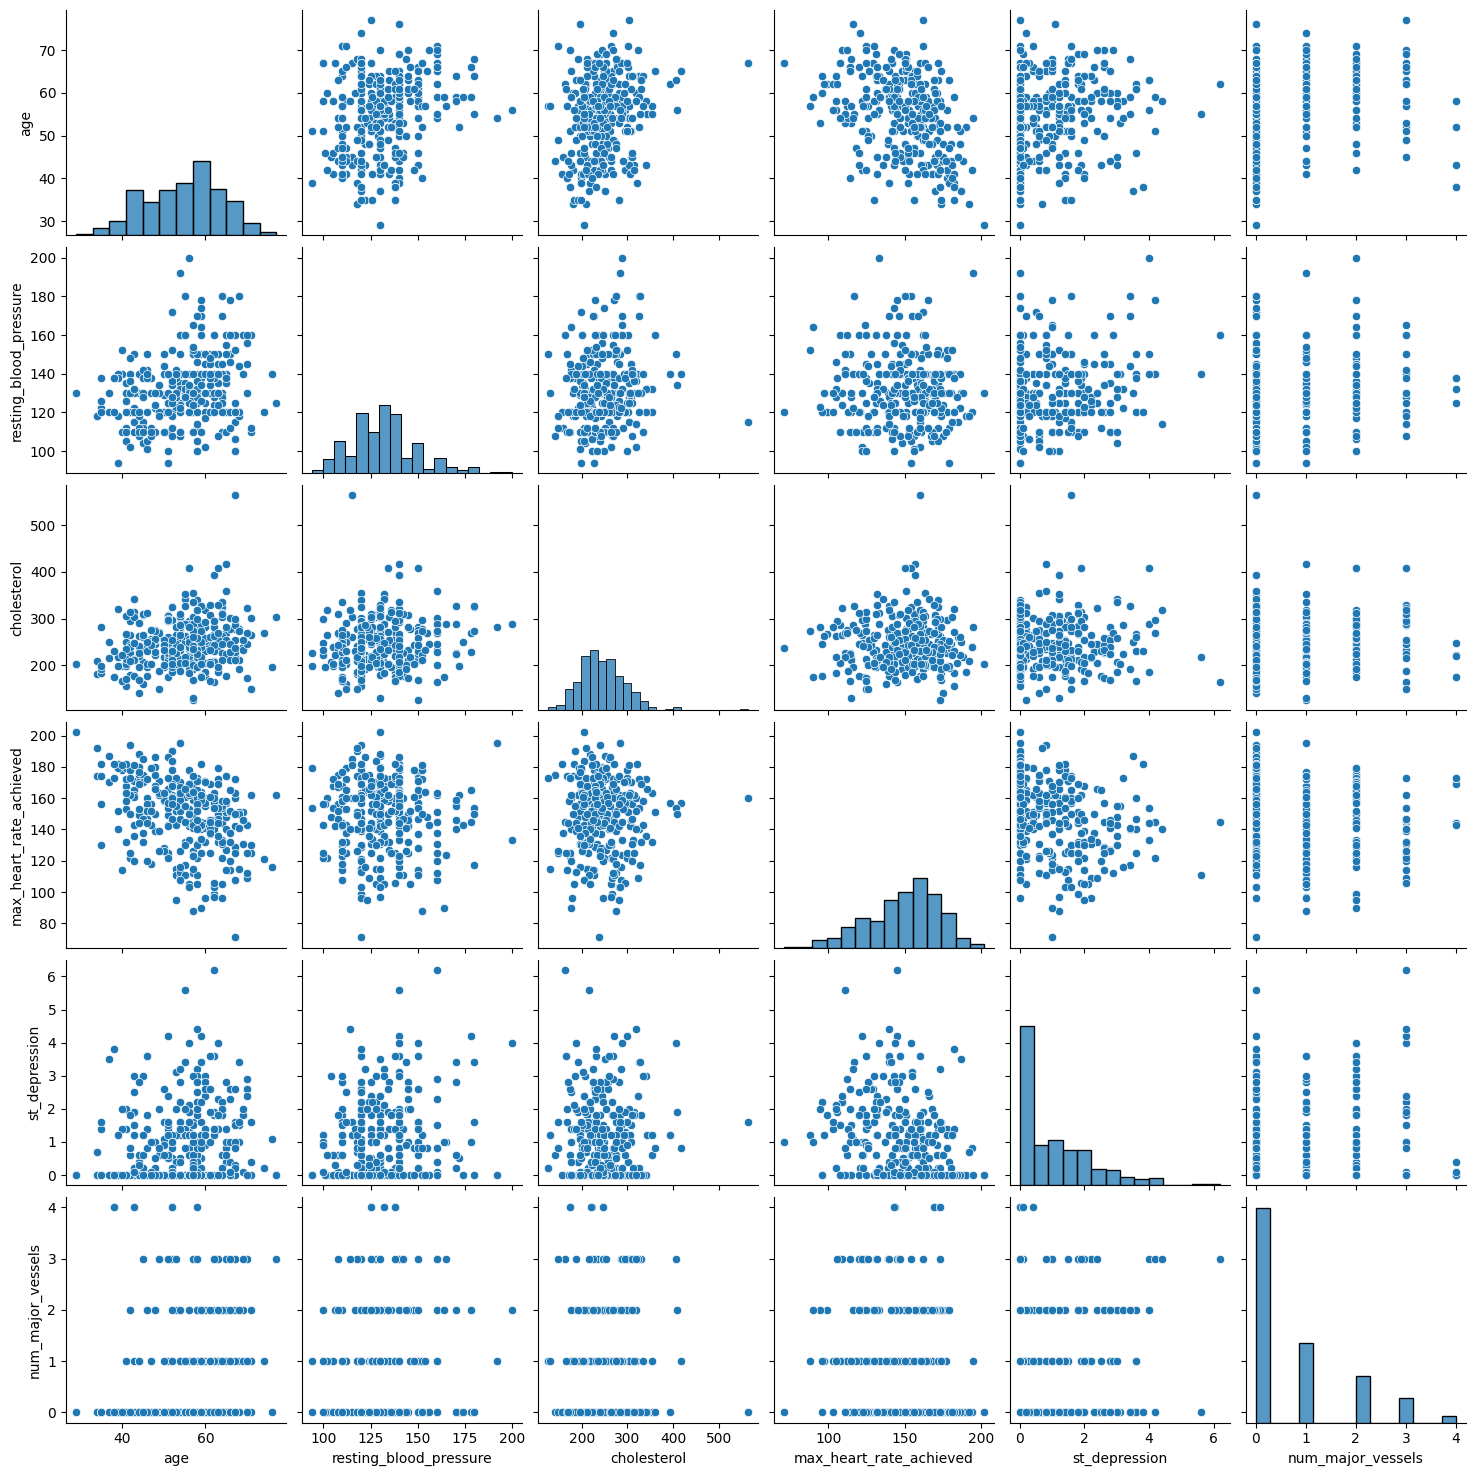

In [ ]:
#Plot pair plot
sns.pairplot(df_corr)

Insights:

1.Age and max heart rate achieved have negative correlation.

2.Age has positive correlation with resting blood pressure,cholestrol and st depression.

3.Remaining variables have weak correlation among them.

# Data Preprocessing

Feature Selection

In [ ]:
#selected features for model building
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels','sex','chest_pain_type','fasting_blood_sugar','rest_ecg','st_slope','thalassemia']

Train - Test split

In [ ]:
#import necessary libraries
from sklearn.model_selection import train_test_split
#split the data
X_train,X_test,y_train,y_test = train_test_split(data.loc[:,names],data['target'],
                                                test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(242, 12)

In [ ]:
X_test.shape

(61, 12)

In [ ]:
y_train.shape

(242,)

In [ ]:
y_test.shape

(61,)

Encoding process

In [ ]:
#import necessary library
from sklearn.preprocessing import OneHotEncoder
#do onehot encoding for categorical features
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
X_train_new = ohe.fit_transform(X_train[['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','st_slope','thalassemia']])
X_test_new = ohe.transform(X_test[['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','st_slope','thalassemia']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#join encoded features with train set
X_train = np.hstack((X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']].values,X_train_new))

In [ ]:
#join encoded features with test set
X_test = np.hstack((X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']].values,X_test_new))

# Logistic Regression

In [ ]:
#import necessary library
from sklearn.linear_model import LogisticRegression
#built regression model
lr = LogisticRegression()
#fit model to both train sets
lr.fit(X_train,y_train)
#predict values
y_pred= lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

**Model Evaluation**

Precission score

In [ ]:
from sklearn.metrics import precision_score
# Get the precision scores
test_precision = precision_score(y_pred,y_test)
print("The precision on test data is ", (test_precision))

The precision on test data is  0.84375


Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
# Get the accuracy scores
test_accuracy = accuracy_score(y_pred,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.9016393442622951


Roc-Auc score

In [ ]:
from sklearn.metrics import roc_auc_score
# Get the roc_auc_score scores
test_roc_auc_score = roc_auc_score(y_test,y_pred)
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.9046336206896551


Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



**Conclusion**

The model achieved the best Roc-Auc score of 0.90 using Logistic Regression